**本章内容：**
> Apriori算法  
频繁项集生成  
关联规则生成   
投票中的关联规则的发现   

## 关联分析

Apriori算法

优点：易编码实现
缺点：在大数据集上可能较慢
适用数据类型：数值型或者标称型数据


关联分析是一种在大规模数据集中寻找有趣关系的任务。这些关系可以由两种形式：频繁项集或者关联规则。

频繁项集（frequent item sets）是经常出现在一块的物品的集合，关联规则（association rules）暗示两种物品之间可能存在很强的关系。

一个来自Hole Foods天然食品店的简单交易清单

|交易号码|商品|
|--|--|
|0|豆奶，莴苣|
|1|莴苣，尿布，葡萄酒，甜菜|
|2|豆奶，尿布，葡萄酒，橙汁|
|3|莴苣，豆奶，尿布，葡萄酒|
|4|莴苣，豆奶，尿布，橙汁|

一个项集的支持度（support）被定义为数据集中包含该项集的记录所记录的比例。从上图可以得到，{豆奶}的支持度4/5，而在5条交易记录中有3条包含{豆奶，尿布}，因此{豆奶，尿布}的支持度为3/5,。支持度是针对项集来说的，因此可以定义为最小支持度，而只保留满足最小支持度的项集。

可信度或置信区间（confidence）是针对一条诸如{尿布}$\to${葡萄酒}的关联规则来定义。这条规则可信度被定义为“支持度{尿布，葡萄酒}/支持度{尿布}”。从上图可以看出，由于{尿布，葡萄酒}的支持度为3/5，了不得支持度为4/5，所以“尿布$\to$葡萄酒”的可信度为3/4=0.75。这意味着对于包含“尿布”的所有记录，我们的规则对其中75%的记录都适用。



## Apriori原理

<table>
    <tr>
        <td>Apriori算法一般过程</td>
    </tr>
</table>
>1. 收集数据：使用任意方法。
2. 准备数据：任何数据类型都可以，因为我们只保存集合。
3. 分析数据：使用任意方法。
4. 训练算法：使用Apriori算法来找到频繁项集。
5. 测试算法：不需要测试过程
6. 使用算法：用于发现频繁项集以及物品之间的关联规则。

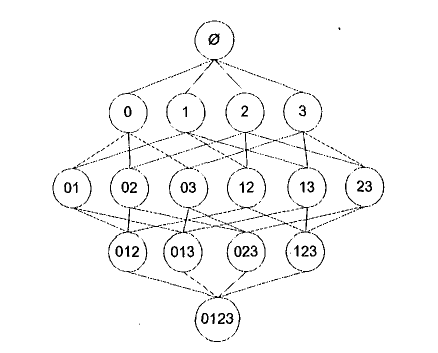

为了降低所需的计算时间，研究人员发现一种所谓的Apriori原理.Apriori原理可以帮助我们减少可能感兴趣的项集。Apriori原理是说如果某个项集是频繁的，那么它的所有自己也是频繁的。这个原理反过来用，也就是说如果一个项集的非频繁集，那么它的所有超集也是非频繁的。

<table>
    <tr>
        <td>Apriori</td>
    </tr>
</table>
apriori在拉丁语中指“来自以前”。当定义问题是，通常会使用先验知识或者假设，这被称作“一个先验”（a prior）。在贝叶斯统计中，使用先验知识作为条件进行推断也很常见。先验知识可能来自领域知识、先前的一些测量结果，等等。


## 使用Apriori算法来发现频繁集

关联分析的目标包括两项：发现频繁项集和发现关联规则。首先需要找到频繁项集，然后才能获得关联规则。

Apriori算法是发现频繁项集的一种方法。Apriori算法的两个输入参数分别是最小支持度和数据集。该算法首先会生成所有单个物品的项集列表。接着扫描交易记录来查看哪些项集满足最小支持度要求，那些不满足最小支持度的集合会被去掉。然后，对剩下的集合进行组合以生成包含两个元素的项集。接下来，再重新扫描交易记录，去掉不满足最小支持度的项集。该过程重复进行直到所有项集都被去掉。

### 生成候选项集

在使用Python来对整个程序编码之前，需创建一些辅助函数。下面会创建一个用于构建初始集合的函数，也会创建一个通过扫描数据集以寻找记录子集的函数。数据集扫描的伪代码大致如下：   

    对数据集中的每条交易记录tran
    对每个候选集can：
        检查一下can是否是tran的子集：
        如果是，则增加can的计数值
    对每个候选项集
    如果其支持度不低于最小值，则保留该项集
    返回所有频繁项集列表
     
     
     











In [2]:
# 创建集合C1，即对dataSet进行去重，排序，放入list中，然后转换所有的元素为frozenset
def loadDataSet():
    return [[1,3,4],[2,3,5],[1,2,3,5],[2,5]]

def createC1(dataSet):
    """
    createC1(创建集合C1)
    
    Args:
        dataSet 元素数据集
    Returns: 
        frozenset 返回一个frozenset格式的list
    """
    C1=[]
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                #遍历所有元素，如果不在C1中出现过，那么久append
                C1.append([item])
    #对数组进行‘从小到大’排序
    print('sort 前',C1)
    C1.sort()
    #frozenset表示冻结的set集合，元素无改变；可以把它当字典key来使用
    print('sort 后',C1)
    print('frozenset=',map(frozenset,C1))
    return map(frozenset,C1)


## 计算候选数据集CK在数据集D中的支持度，并返回支持度大于最小支持度（MinSupport）的数据

In [ ]:
#计算候选数据集CK在数据集D中的支持度，并返回支持度大于最小支持度（minSupport）的数据
def scanD(D,CK,minSupport):
    """
    scanD（计算候选数据集CK在数据集D中的支持度，并返回支持度大于最小支持度minSupport）
    
    Args:
        D 数据集
        CK 候选项集列表
        minSupport 最小支持度
        
    Returns:
        reList 支持度大于minSupport的集合
        supportData 候选项集支持的数据
    """
    
    # ssCnt 临时存放候选数据集CK的频率。例如：a->10,b->5,c->8
    ssCnt={}
    for tid in D:
        for can in CK:
            if can.issubset(tid):
                if not ssCnt.has_key(can):ssCnt[can]=1
                    else: ssCnt[can]+=1
    numItems=float(len(D))
    retList=[]
    supportData={}
    for key in ssCnt:
        support=ssCnt[key]/numItems
        if support>=minSupport:
            retList.insert(0,key)
            supportData[key]=support
    return retList,supportData
                
        